# Analisis para saber si se van a alinear o se pueden alinear adecuadamente los candidatos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
sys.path.append('../math_tricks/')
import funciones_CLICK as fc
%matplotlib inline

In [2]:
new_df_cliques1 = pd.read_pickle('../clique1.pkl')
new_df_cliques2 = pd.read_pickle('../clique2.pkl')

candidatos = pd.read_csv('../candidatos.csv')

# max_clique1 = pd.read_csv('../clique1_maximal.csv')
# max_clique2 = pd.read_csv('../clique2_maximal.csv')

df_atoms1 = pd.read_pickle('../clique1_df_atributos.pkl')
df_atoms2 = pd.read_pickle('../clique2_df_atributos.pkl')

rmsd = pd.read_pickle("../rmsd_picke.pkl").reset_index(drop=True)
# rmsd.columns = ['rmsd','candidatos','matriz_de_rotacion']

In [3]:
%%time
lista_vectores_gorro = []
for i,bari in enumerate(new_df_cliques1.baricentro_clique.values):
    lista_pre_vectores = []
#     if i < 5:
    for coord in df_atoms1.vector.values:
#             print(bari,coord)
        lista_pre_vectores.append(coord - bari)
#             print('aa'*20)
    lista_vectores_gorro.append(lista_pre_vectores)

CPU times: user 151 ms, sys: 16.3 ms, total: 167 ms
Wall time: 166 ms


In [4]:
vectores_gorro_proteina_1 = pd.DataFrame(lista_vectores_gorro)

In [5]:
%%time
lista_vectores_gorro = []
for i,bari in enumerate(new_df_cliques2.baricentro_clique.values):
    lista_pre_vectores = []
#     if i < 5:
    for coord in df_atoms2.vector.values:
#             print(bari,coord)
        lista_pre_vectores.append(coord - bari)
#             print('aa'*20)
    lista_vectores_gorro.append(lista_pre_vectores)

CPU times: user 144 ms, sys: 23.9 ms, total: 168 ms
Wall time: 166 ms


In [6]:
vectores_gorro_proteina_2 = pd.DataFrame(lista_vectores_gorro)

1.202217064689433
1.2783052485104345


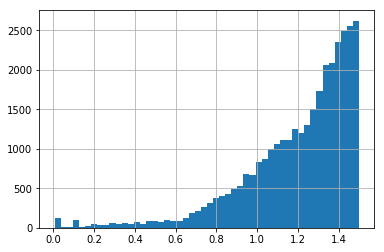

In [7]:
rmsd.rmsd.hist(bins=50)
print(rmsd.rmsd.mean())
print(rmsd.rmsd.median())

# Alineamiento de uno

In [148]:
# candidato que obtuve menor RMSD
rmsd.iloc[rmsd.rmsd.idxmin()]

rmsd                 0.00622                                                                                                                                                                                                 
candidatos            (291, 182)                                                                                                                                                                                             
matriz_rotacion       [[-0.9983009414423969, -0.048634907300823496, 0.032091682833166615], [0.029008789788845985, 0.06282036211591413, 0.9976031737212007], [-0.0505343490134265, 0.9968391283930752, -0.061302786839779855]]
candidato_clique_1    291                                                                                                                                                                                                    
candidato_clique_2    182                                                                                       

In [12]:
# Atributos del clique 1 de la proteina 1
new_df_cliques1.iloc[rmsd.iloc[rmsd.rmsd.idxmin()].candidato_clique_1].head()

0   145.00000
1   146.00000
2   147.00000
3   148.00000
4   149.00000
Name: 130, dtype: object

In [13]:
# Atributos del clique 2 de la proteina 2
new_df_cliques2.iloc[rmsd.iloc[rmsd.rmsd.idxmin()].candidato_clique_2].head()

0   100.00000
1   101.00000
2   102.00000
3   103.00000
4   104.00000
Name: 246, dtype: object

In [14]:
# vectores gorro de la proteina 1
vectores_gorro_proteina_1.iloc[130].head()

0    [9.193000000000001, -4.62828571428571, 6.91714285714286]  
1    [9.755000000000003, -5.12828571428571, 5.674142857142858] 
2    [8.824000000000002, -4.712285714285713, 4.53914285714286] 
3    [7.602, -4.7542857142857144, 4.67914285714286]            
4    [9.905000000000001, -6.659285714285716, 5.738142857142858]
Name: 130, dtype: object

In [15]:
# vectores gorro de la proteina 2
vectores_gorro_proteina_2.iloc[246].head()

0    [17.24214285714286, -7.589142857142856, 23.395142857142854] 
1    [16.450142857142858, -7.487142857142856, 24.685142857142857]
2    [15.287142857142857, -6.498142857142856, 24.476142857142854]
3    [14.202142857142857, -6.630142857142856, 25.042142857142856]
4    [17.363142857142858, -7.030142857142856, 25.865142857142857]
Name: 246, dtype: object

In [16]:
# proteina 1
df_atoms1.shape

(532, 5)

In [17]:
# proteina 2
df_atoms2.shape

(878, 5)

In [149]:
def rotation_vectors(vector_gorro, matriz_rotacion):
    """obtencion de vector rotado,
    utilizando la matriz de rotacion
    y los vectores gorro a rotar y trasladar"""

    coord_rotado_trasladado = [np.matmul(
        matriz_rotacion, i.reshape(3, 1)).T[0] for i in vector_gorro]
    return (coord_rotado_trasladado)

In [19]:
# se obtiene la matriz de rotacion del menor rmsd
# se aplica a todos los vectores gorro de la proteina 1 que ya se le quito el baricentro del candidato 1
matriz_rotacion = rmsd.iloc[rmsd.rmsd.idxmin()].matriz_rotacion
vector_gorro = vectores_gorro_proteina_1.iloc[130].values
#se obtienen coordendas rotadas
coord_vectores_rotados = [np.matmul(matriz_rotacion, i.reshape(3, 1)).T[0] for i in vector_gorro]

In [20]:
# las coordenadas anteriores se le suma el baricentro del candidato seleccionado de la proteina 2
baricentro_proteina_2 = new_df_cliques2.iloc[rmsd.iloc[rmsd.rmsd.idxmin()].candidato_clique_2].baricentro_clique
vector_rotado_trasladado_a_clique2 = coord_vectores_rotados + baricentro_proteina_2 #nuevas coordendas proteina 1

In [21]:
df_atoms2['x'] = [i[0] for i in df_atoms2.vector]
df_atoms2['y'] = [i[1] for i in df_atoms2.vector]
df_atoms2['z'] = [i[2] for i in df_atoms2.vector]

In [22]:
new_df_atom1 = pd.concat([df_atoms1,pd.DataFrame(vector_rotado_trasladado_a_clique2,columns=['x','y','z'])],1)
new_df_atom1.head()
new_df_atom1[['atom_name','x','y','z']].to_csv('1xxa_rot_tras.xyz',sep=' ',header=False,index=False)

In [23]:
df_atoms2.head()
df_atoms2[['atom_name','x','y','z']].to_csv('1tig.xyz',sep=' ',header=False,index=False)

In [24]:
# np.array(rmsd['2'].values[0].split('\n')[0][3:-1].split(), dtype=float) for i in rmsd['2'].shape[0]

In [38]:
new_df_atom1['new_vector'] = [ [new_df_atom1.iloc[i]['x'],new_df_atom1.iloc[i]['y'],new_df_atom1.iloc[i]['z']] for i in range(new_df_atom1.shape[0])]
# new_df_atom1

In [66]:
new_df_atom1.head(2)

,atom_number,atom_name,residue_name,residue_number,vector,x,y,z,new_vector
0,1,N,LEU,82,"[28.39, 57.093, 26.056]",-3.91110,15.90738,-5.00935,"[-3.9110999059406693, 15.9073833727848, -5.009353798739884]"
1,2,CA,LEU,82,"[28.952, 56.593, 24.813]",-4.46911,14.64106,-5.45202,"[-4.469109275578163, 14.641064575452297, -5.45202212482516]"


In [57]:
new_df_atom1.head().values

array([[1, 'N', 'LEU', 82, array([28.39 , 57.093, 26.056]),
        -3.9110999059406693, 15.9073833727848, -5.009353798739884,
        list([-3.9110999059406693, 15.9073833727848, -5.009353798739884])],
       [2, 'CA', 'LEU', 82, array([28.952, 56.593, 24.813]),
        -4.469109275578163, 14.641064575452297, -5.45202212482516,
        list([-4.469109275578163, 14.641064575452297, -5.45202212482516])],
       [3, 'C', 'LEU', 82, array([28.021, 57.009, 23.678]),
        -3.587702162886438, 13.523696036021487, -4.901884824883872,
        list([-3.587702162886438, 13.523696036021487, -4.901884824883872])],
       [4, 'O', 'LEU', 82, array([26.799, 56.967, 23.818]),
        -2.3626579707891118, 13.639845339059011, -4.881291942314586,
        list([-2.3626579707891118, 13.639845339059011, -4.881291942314586])],
       [5, 'CB', 'LEU', 82, array([29.102, 55.062, 24.877]),
        -4.5288788222748595, 14.596736701663716, -6.989884160540027,
        list([-4.5288788222748595, 14.5967367016637

In [114]:
import read_pdb_tools as rpt
file1 = '../pdbs/1xxa.pdb'
pdb1 = rpt.PdbStruct(file1)
pdb1.AddPdbData("%s" % file1)
pdb11 = pdb1.GetResChain()

In [115]:
%%time
for i in pdb11:
    mask = np.where(i.resi == new_df_atom1.residue_number,True,False)
    for j in new_df_atom1[mask].atom_name:
#         print(i.GetAtom(j).coord)
#         print(type(i.GetAtom(j).coord))
        mask_2 = np.where(new_df_atom1[mask].atom_name == j,True,False)
        i.GetAtom(j).UpDateValue('coord', new_df_atom1[mask][mask_2].new_vector.values[0])
#         print(i.GetAtom(j).coord)
#         print(type(i.GetAtom(j).coord))
#         print('//////'*23)

CPU times: user 598 ms, sys: 7.18 ms, total: 605 ms
Wall time: 598 ms


In [133]:
pdb1.pdbdata = pdb11

In [138]:
pdb1.WriteToFile()

In [137]:
pdb1.name

'../pdbs/1xxa.pdb'

In [140]:
new_df_atom1.head()

,atom_number,atom_name,residue_name,residue_number,vector,x,y,z,new_vector
0,1,N,LEU,82,"[28.39, 57.093, 26.056]",-3.91110,15.90738,-5.00935,"[-3.9110999059406693, 15.9073833727848, -5.009353798739884]"
1,2,CA,LEU,82,"[28.952, 56.593, 24.813]",-4.46911,14.64106,-5.45202,"[-4.469109275578163, 14.641064575452297, -5.45202212482516]"
2,3,C,LEU,82,"[28.021, 57.009, 23.678]",-3.58770,13.52370,-4.90188,"[-3.587702162886438, 13.523696036021487, -4.901884824883872]"
3,4,O,LEU,82,"[26.799, 56.967, 23.818]",-2.36266,13.63985,-4.88129,"[-2.3626579707891118, 13.639845339059011, -4.881291942314586]"
4,5,CB,LEU,82,"[29.102, 55.062, 24.877]",-4.52888,14.59674,-6.98988,"[-4.5288788222748595, 14.596736701663716, -6.989884160540027]"


# Alineacion para encontrar la mejor rotacion y traslacion

In [2]:
new_df_cliques1 = pd.read_pickle('../clique1.pkl')
new_df_cliques2 = pd.read_pickle('../clique2.pkl')

candidatos = pd.read_csv('../candidatos.csv')

df_atoms1 = pd.read_pickle('../clique1_df_atributos.pkl')
df_atoms2 = pd.read_pickle('../clique2_df_atributos.pkl')

rmsd = pd.read_pickle("../rmsd_picke.pkl").reset_index(drop=True)

In [3]:
%%time
lista_vectores_gorro = []
for i,bari in enumerate(new_df_cliques1.baricentro_clique.values):
    lista_pre_vectores = []
#     if i < 5:
    for coord in df_atoms1.vector.values:
#             print(bari,coord)
        lista_pre_vectores.append(coord - bari)
#             print('aa'*20)
    lista_vectores_gorro.append(lista_pre_vectores)

CPU times: user 193 ms, sys: 79 µs, total: 193 ms
Wall time: 192 ms


In [4]:
vectores_gorro_proteina_1 = pd.DataFrame(lista_vectores_gorro)

In [5]:
%%time
lista_vectores_gorro = []
for i,bari in enumerate(new_df_cliques2.baricentro_clique.values):
    lista_pre_vectores = []
#     if i < 5:
    for coord in df_atoms2.vector.values:
#             print(bari,coord)
        lista_pre_vectores.append(coord - bari)
#             print('aa'*20)
    lista_vectores_gorro.append(lista_pre_vectores)

CPU times: user 183 ms, sys: 4.22 ms, total: 187 ms
Wall time: 186 ms


In [6]:
vectores_gorro_proteina_2 = pd.DataFrame(lista_vectores_gorro)

In [7]:
%%time
#para cada candidato
candidato = []
protein_to_compare = [i for i in df_atoms2.vector.values]

for idx in range(rmsd.shape[0]):
    #tomas la matriz de rotacion y se la aplicas a los vectores gorro correspondientes
    matriz_rotacion = rmsd.iloc[idx].matriz_rotacion
    
    vector_gorro = vectores_gorro_proteina_1.iloc[rmsd.iloc[idx].candidato_clique_1].values
    
    coord_vectores_rotados = [np.matmul(matriz_rotacion, i.reshape(3, 1)).T[0] for i in vector_gorro]
    
    baricentro_proteina_2 = new_df_cliques2.iloc[rmsd.iloc[idx].candidato_clique_2].baricentro_clique
    
    protein_trasladado_rotado = coord_vectores_rotados + baricentro_proteina_2 #nuevas coordendas proteina 1
    #RMSD
    p12 = np.sum((protein_to_compare - protein_trasladado_rotado) ** 2, 1)
    rmsd_i = lambda i: np.sqrt(i) / 3
    candidato.append([np.where(rmsd_i(p12) <= 3.5,1,0).mean(), idx])

CPU times: user 1min 7s, sys: 35.9 ms, total: 1min 7s
Wall time: 1min 7s


In [8]:
df_so = pd.DataFrame(candidato,columns=['SO','index'])

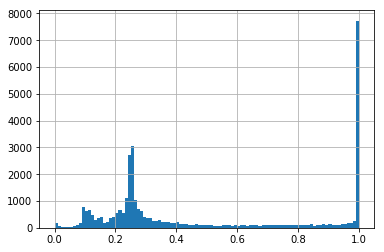

In [9]:
df_so.SO.hist(bins=100)

In [10]:
numero = df_so[df_so.SO == df_so.SO.quantile(0.90)].index[np.random.randint(df_so[df_so.SO == df_so.SO.quantile(0.90)].shape[0])]

In [15]:
idx = 30401
matriz_rotacion = rmsd.iloc[idx].matriz_rotacion
    
vector_gorro = vectores_gorro_proteina_1.iloc[rmsd.iloc[idx].candidato_clique_1].values

coord_vectores_rotados = [np.matmul(matriz_rotacion, i.reshape(3, 1)).T[0] for i in vector_gorro]

baricentro_proteina_2 = new_df_cliques2.iloc[rmsd.iloc[idx].candidato_clique_2].baricentro_clique

protein_trasladado_rotado = coord_vectores_rotados + baricentro_proteina_2 #nuevas coordendas proteina 1

In [16]:
new_df_atom1 = pd.concat([df_atoms1,pd.DataFrame(protein_trasladado_rotado,columns=['x','y','z'])],1)
new_df_atom1['new_vector'] = [ [new_df_atom1.iloc[i]['x'],new_df_atom1.iloc[i]['y'],new_df_atom1.iloc[i]['z']] for i in range(new_df_atom1.shape[0])]

In [17]:
import read_pdb_tools as rpt
file1 = '../pdbs/1xxa_prueba.pdb'
pdb1 = rpt.PdbStruct(file1)
pdb1.AddPdbData("%s" % file1)
pdb11 = pdb1.GetResChain()

In [18]:
%%time
for i in pdb11:
    mask = np.where(i.resi == new_df_atom1.residue_number,True,False)
    for j in new_df_atom1[mask].atom_name:
        mask_2 = np.where(new_df_atom1[mask].atom_name == j,True,False)
        i.GetAtom(j).UpDateValue('coord', new_df_atom1[mask][mask_2].new_vector.values[0])

CPU times: user 583 ms, sys: 4.02 ms, total: 587 ms
Wall time: 584 ms


In [19]:
pdb1.pdbdata = pdb11

In [20]:
pdb1.WriteToFile()

# ANalisis match cliques

In [20]:
new_df_cliques1.iloc[354][0:7]

0   115.00000
1   116.00000
2   117.00000
3   118.00000
4   120.00000
5   121.00000
6   122.00000
Name: 354, dtype: object

In [60]:
new_df_cliques2.iloc[119][0:7]

0   135.00000
1   136.00000
2   137.00000
3   139.00000
4   120.00000
5   121.00000
6   122.00000
Name: 119, dtype: object

In [59]:
rmsd.head(9)

,rmsd,candidatos,matriz_rotacion,candidato_clique_1,candidato_clique_2
0,0.86520,"(0, 3)","[[0.9950548850895354, 0.08611442877773165, -0.04949829103854832], [0.052015813303643466, -0.8763209363292067, -0.47891123573942534], [-0.08461755625053442, 0.47396827078127063, -0.8764667406506651]]",0,3
1,1.25015,"(0, 4)","[[-0.9573254954488533, -0.1880884474379996, -0.21943252198334295], [-0.24021924540211956, 0.09569022292322943, 0.9659907325514767], [-0.16069415017991068, 0.9774794714863659, -0.13678915498200434]]",0,4
2,1.07473,"(0, 13)","[[0.9576922179434058, 0.21631909386441256, 0.18982008671455147], [0.2784346504972642, -0.863275225759657, -0.42098697128542995], [0.07279945805503445, 0.45602843575734675, -0.8869826969493828]]",0,13
3,1.29940,"(0, 102)","[[0.7215636635843963, 0.45546980004194604, -0.5214337356217124], [-0.4172826470205694, 0.8870748442043459, 0.19741685154854993], [0.5524681636892491, 0.07513642278938328, 0.8301406182570781]]",0,102
4,1.37764,"(0, 103)","[[0.7228806004745626, 0.43970263095638584, -0.5330152284762301], [-0.41664024985249215, 0.8927632702511646, 0.17141950149647045], [0.5512300242733411, 0.09815976579270097, 0.828559062903263]]",0,103
5,1.36834,"(0, 104)","[[0.7229601795860776, 0.4629281428802265, -0.5128607152651986], [-0.42944114372762326, 0.8826004268545802, 0.1913028765858575], [0.5412105715955456, 0.08193913012460899, 0.8368853542437251]]",0,104
6,1.46832,"(0, 119)","[[0.8683986628063316, 0.31670668608602387, -0.3815503078554441], [-0.29384232415178574, 0.9484788848976669, 0.11850946561501194], [0.399425150651849, 0.009202167771103727, 0.9167196240591016]]",0,119
7,0.84438,"(1, 1)","[[0.9700890969304428, 0.1952650342201006, -0.1442175801617167], [0.1441234765482975, -0.9413519826033823, -0.3050981290606581], [-0.1953345016230123, 0.275187229463332, -0.94133757027752]]",1,1
8,1.36425,"(1, 5)","[[0.9944023876010669, 0.05316553614323488, -0.09130891139368552], [0.010892756860249615, -0.911161611984035, -0.4119051646855602], [-0.10509633381465316, 0.4086048734575462, -0.9066404017059143]]",1,5


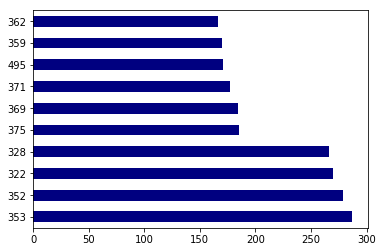

In [35]:
idx_1 = rmsd.candidato_clique_1.value_counts().head(10).index
rmsd.candidato_clique_1.value_counts().head(10).plot.barh(color='navy')

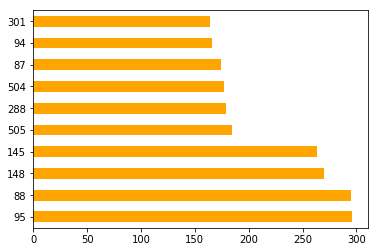

In [36]:
idx_2 = rmsd.candidato_clique_2.value_counts().head(10).index
rmsd.candidato_clique_2.value_counts().head(10).plot.barh(color='orange')

In [70]:
new_df_cliques1.iloc[idx_1,[0,1,2,3,4,5,6]]
# .ix[:, [0,1,2,3,4,5,6]]

,0,1,2,3,4,5,6
353,136.00000,116.00000,117.00000,118.00000,119.00000,120.00000,122.00000
352,136.00000,116.00000,117.00000,118.00000,119.00000,120.00000,121.00000
322,135.00000,136.00000,116.00000,117.00000,119.00000,120.00000,122.00000
328,135.00000,136.00000,116.00000,117.00000,119.00000,120.00000,121.00000
375,99.00000,101.00000,104.00000,105.00000,108.00000,85.00000,86.00000
369,99.00000,100.00000,101.00000,104.00000,108.00000,85.00000,86.00000
371,100.00000,101.00000,104.00000,105.00000,108.00000,85.00000,86.00000
495,99.00000,100.00000,101.00000,104.00000,105.00000,85.00000,86.00000
359,115.00000,116.00000,117.00000,118.00000,119.00000,120.00000,121.00000
362,115.00000,116.00000,117.00000,118.00000,119.00000,120.00000,122.00000


In [71]:
new_df_cliques2.iloc[idx_2,[0,1,2,3,4,5,6]]

,0,1,2,3,4,5,6
95,136.00000,116.00000,117.00000,118.00000,119.00000,120.00000,122.00000
88,136.00000,116.00000,117.00000,118.00000,119.00000,120.00000,121.00000
148,135.00000,136.00000,116.00000,117.00000,119.00000,120.00000,122.00000
145,135.00000,136.00000,116.00000,117.00000,119.00000,120.00000,121.00000
505,99.00000,101.00000,104.00000,105.00000,108.00000,85.00000,86.00000
288,99.00000,100.00000,101.00000,104.00000,108.00000,85.00000,86.00000
504,100.00000,101.00000,104.00000,105.00000,108.00000,85.00000,86.00000
87,115.00000,116.00000,117.00000,118.00000,119.00000,120.00000,121.00000
94,115.00000,116.00000,117.00000,118.00000,119.00000,120.00000,122.00000
301,99.00000,100.00000,101.00000,104.00000,105.00000,85.00000,86.00000


In [87]:
new_df_cliques1['clique_residuos'] = [
    [int(new_df_cliques1.iloc[i,0]),int(new_df_cliques1.iloc[i,1]),int(new_df_cliques1.iloc[i,2]),
 int(new_df_cliques1.iloc[i,3]),int(new_df_cliques1.iloc[i,4]),
 int(new_df_cliques1.iloc[i,5]),int(new_df_cliques1.iloc[i,6])] for i in range(new_df_cliques1.shape[0])]

In [88]:
new_df_cliques2['clique_residuos'] = [
    [int(new_df_cliques2.iloc[i,0]),int(new_df_cliques2.iloc[i,1]),int(new_df_cliques2.iloc[i,2]),
 int(new_df_cliques2.iloc[i,3]),int(new_df_cliques2.iloc[i,4]),
 int(new_df_cliques2.iloc[i,5]),int(new_df_cliques2.iloc[i,6])] for i in range(new_df_cliques2.shape[0])]

In [90]:
new_df_cliques1.clique_residuos.head()

0    [96, 97, 98, 99, 132, 131, 89] 
1    [96, 97, 98, 132, 133, 91, 95] 
2    [96, 97, 98, 131, 132, 133, 95]
3    [96, 97, 132, 133, 91, 94, 95] 
4    [96, 97, 132, 133, 134, 91, 95]
Name: clique_residuos, dtype: object

In [91]:
new_df_cliques2.clique_residuos.head()

0    [96, 97, 98, 131, 99, 132, 89] 
1    [96, 97, 98, 132, 133, 91, 95] 
2    [96, 97, 98, 133, 145, 91, 95] 
3    [97, 98, 99, 100, 131, 130, 89]
4    [97, 98, 99, 100, 130, 88, 89] 
Name: clique_residuos, dtype: object